In [1]:
# Dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import spacy
from config import consumer_key, consumer_secret, access_token, access_token_secret
from IPython.display import display_html


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Authorization    
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
# Load the spaCy model
nlp = spacy.load("en_core_web_md")

In [3]:
# Function to create dataframe with full_text, created_at, and retweets

def get_tweets(user, num=500):
    # Takes a twitter handle and number of tweets, returns a database of full_text, created_at, 
    # created_at formatted as an int, and retweets.
    tweets = pd.DataFrame([status._json for status in tweepy.Cursor(api.user_timeline, id=user, tweet_mode="extended")
             .items(num)])[["full_text", "created_at", "retweet_count"]]
    
    tweets["int_time"] = tweets.created_at.map(lambda x: int(datetime.strptime(x, "%a %b %d %H:%M:%S +0000 %Y").strftime("%Y%m%d%H%M")) )
    
    return tweets

In [4]:
# Testing get_tweets function
trump_tweets = get_tweets("realDonaldTrump", 500)
trump_tweets

,full_text,created_at,retweet_count,int_time
0,NEW RECORD FOR NASDAQ!,Mon Aug 17 20:50:15 +0000 2020,5565,202008172050
1,SAVE THE POST OFFICE!,Mon Aug 17 20:18:10 +0000 2020,11068,202008172018
2,Why is Congress scheduled to meet (on Post Off...,Mon Aug 17 20:15:39 +0000 2020,10395,202008172015
3,Great division between the Bernie Sanders crow...,Mon Aug 17 20:07:22 +0000 2020,6419,202008172007
4,"Just landed in Mankato, Minnesota!",Mon Aug 17 18:37:29 +0000 2020,9898,202008171837
...,...,...,...,...
495,RT @seanhannity: TOMORROW I join The Great One...,Sun Aug 02 04:05:24 +0000 2020,2988,202008020405
496,RT @seanhannity: GRAHAM: The FBI ‘Lied Their A...,Sun Aug 02 04:05:16 +0000 2020,8078,202008020405
497,RT @JohnWHuber: More delays - DC Circuit WILL ...,Sun Aug 02 04:00:38 +0000 2020,5755,202008020400
498,RT @AndreasShrugged: The German -10.1% contrac...,Sun Aug 02 03:55:08 +0000 2020,3292,202008020355


In [5]:
# Testing Biden
biden_tweets = get_tweets("JoeBiden")
biden_tweets

,full_text,created_at,retweet_count,int_time
0,Just imagine where we would be right now if we...,Mon Aug 17 21:00:00 +0000 2020,3729,202008172100
1,"Secretary Esper and President Trump, it's a pr...",Mon Aug 17 19:30:00 +0000 2020,3427,202008171930
2,There are only 78 days until Election Day — an...,Mon Aug 17 17:30:00 +0000 2020,2649,202008171730
3,"We may be physically apart, but this week Demo...",Mon Aug 17 15:25:00 +0000 2020,3281,202008171525
4,The hard truth is that our economy wasn't work...,Mon Aug 17 13:59:00 +0000 2020,10529,202008171359
...,...,...,...,...
495,I wish I could say this hate began with Donald...,Mon Jun 15 22:55:00 +0000 2020,9289,202006152255
496,I'm grateful for @PPact's support and proud to...,Mon Jun 15 20:45:24 +0000 2020,3183,202006152045
497,"Donald Trump is not responsible for COVID-19, ...",Mon Jun 15 20:00:00 +0000 2020,13704,202006152000
498,Race-neutral policies are not a sufficient res...,Mon Jun 15 17:20:00 +0000 2020,3982,202006151720


In [6]:
# Variable for a weekago

weekago = int(datetime.strftime(datetime.now() - timedelta(days=7), "%Y%m%d%H%M"))
weekago

202008101519

In [7]:
# Function to create a new dataframe from tweets just from the past week

def candidate_week(dataframe):
    # Takes a dataframe and selects only the tweets from the past week, returns a new dataframe
    # Adds columns with day of week and hour the tweet was made
    tweet_week = dataframe.loc[dataframe["int_time"] >= weekago]
    tweet_week["hour"] = tweet_week.created_at.map(lambda x: datetime.strptime(x, "%a %b %d %H:%M:%S +0000 %Y").strftime("%H %p"))
    tweet_week["day"] = tweet_week.created_at.map(lambda x: datetime.strptime(x, "%a %b %d %H:%M:%S +0000 %Y").strftime("%a"))
    
    return tweet_week

In [50]:
# Testing the function for Trump and Biden
trump_week = candidate_week(trump_tweets)
trump_week[11:36]

/Users/Sabrina/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/Sabrina/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,full_text,created_at,retweet_count,int_time,hour,day
11,RT @EricTrump: .@realDonaldTrump Boat Parade t...,Mon Aug 17 01:31:50 +0000 2020,27339,202008170131,01 AM,Mon
12,RT @nypost: Kamala Harris reportedly owes $1M ...,Mon Aug 17 01:31:19 +0000 2020,14735,202008170131,01 AM,Mon
13,RT @realDonaldTrump: Vote for TRUMP on Novembe...,Mon Aug 17 01:30:51 +0000 2020,35954,202008170130,01 AM,Mon
14,RT @EricTrump: Durham probe: Ex-FBI lawyer to ...,Mon Aug 17 01:30:34 +0000 2020,8595,202008170130,01 AM,Mon
15,RT @EricTrump: This says it all. Our Mayor can...,Mon Aug 17 01:30:18 +0000 2020,25846,202008170130,01 AM,Mon
16,"RT @realDonaldTrump: Thank you James. Sadly, y...",Mon Aug 17 01:29:53 +0000 2020,72092,202008170129,01 AM,Mon
17,RT @bennyjohnson: TRUMP: “If stupid people are...,Mon Aug 17 01:29:28 +0000 2020,11856,202008170129,01 AM,Mon
18,RT @GOPChairwoman: President @realDonaldTrump ...,Mon Aug 17 01:28:45 +0000 2020,7337,202008170128,01 AM,Mon
19,RT @TeamTrump: Senior Advisor @JaredKushner: I...,Mon Aug 17 01:28:22 +0000 2020,5727,202008170128,01 AM,Mon
20,RT @TeamTrump: Senior Advisor @JaredKushner on...,Mon Aug 17 01:28:12 +0000 2020,5122,202008170128,01 AM,Mon


In [9]:
biden_week = candidate_week(biden_tweets)
biden_week

/Users/Sabrina/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/Sabrina/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,full_text,created_at,retweet_count,int_time,hour,day
0,Just imagine where we would be right now if we...,Mon Aug 17 21:00:00 +0000 2020,3729,202008172100,21 PM,Mon
1,"Secretary Esper and President Trump, it's a pr...",Mon Aug 17 19:30:00 +0000 2020,3427,202008171930,19 PM,Mon
2,There are only 78 days until Election Day — an...,Mon Aug 17 17:30:00 +0000 2020,2649,202008171730,17 PM,Mon
3,"We may be physically apart, but this week Demo...",Mon Aug 17 15:25:00 +0000 2020,3281,202008171525,15 PM,Mon
4,The hard truth is that our economy wasn't work...,Mon Aug 17 13:59:00 +0000 2020,10529,202008171359,13 PM,Mon
...,...,...,...,...,...,...
67,"Folks, we need to listen to our frontline hero...",Mon Aug 10 22:30:00 +0000 2020,6394,202008102230,22 PM,Mon
68,Bristol Bay is no place for a mine — our admin...,Mon Aug 10 21:00:00 +0000 2020,5768,202008102100,21 PM,Mon
69,"Donald Trump said that if he’s re-elected, he’...",Mon Aug 10 20:43:00 +0000 2020,35231,202008102043,20 PM,Mon
70,President Trump keeps attacking the U.S. Posta...,Mon Aug 10 18:20:00 +0000 2020,16367,202008101820,18 PM,Mon


In [10]:
# Variables for how many tweets for each candidate
trump_num = trump_week.full_text.count()
biden_num = biden_week.full_text.count()
print(f"Trump: {trump_num}, Biden: {biden_num}")

Trump: 280, Biden: 72


In [41]:
# Function to group the tweets and return a heatmap of when a candidate tweets

def tweet_heatmap(dataframe, name ,cap_num, color="red"):
    # Takes a dataframe, groups by day and hour, returns a dataframe heatmap
    dataframe_grouped = dataframe.groupby(["hour", "day"]).count().unstack("day", fill_value=0)["full_text"]

    # Reorder the days
    dataframe_grouped = dataframe_grouped[["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]]

    # Colormapping
    cm = sns.light_palette(color, as_cmap=True)

    tweet_heatmap = dataframe_grouped.style.background_gradient(cmap=cm)
    tweet_heatmap.set_caption(f"{name}: {cap_num} tweets for this past week.")
    
    return tweet_heatmap

In [42]:
# Testing the heatmap function

trump_heatmap = tweet_heatmap(trump_week, "realDonaldTrump", trump_num)
trump_heatmap

day,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour,,,,,,,
00 AM,1,0,0,0,0,0,0
01 AM,26,0,0,1,0,0,0
02 AM,0,0,1,3,0,0,0
03 AM,0,0,0,0,0,1,0
04 AM,0,0,0,0,4,1,0
10 AM,0,0,0,2,0,0,0
11 AM,1,4,3,1,44,17,2
12 PM,0,2,2,0,0,3,0
13 PM,0,0,0,1,10,0,0


In [43]:
biden_heatmap = tweet_heatmap(biden_week, "JoeBiden", biden_num, "blue")
biden_heatmap

day,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour,,,,,,,
00 AM,1,1,1,0,1,1,1
01 AM,0,0,1,0,0,0,0
02 AM,0,1,0,1,0,0,0
03 AM,0,0,1,0,0,0,0
12 PM,0,0,1,0,0,0,1
13 PM,1,1,1,0,0,0,0
14 PM,0,0,1,1,1,1,0
15 PM,1,0,1,1,1,1,1
16 PM,0,1,0,0,0,0,0


In [47]:
# Display the dataframe side by side
trump_styler = trump_heatmap.set_table_attributes("style='display:inline'")
biden_styler = biden_heatmap.set_table_attributes("style='display:inline'")

tweet_times = display_html(trump_styler._repr_html_()+biden_styler._repr_html_(), raw=True)
tweet_times

day,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour,,,,,,,
00 AM,1,0,0,0,0,0,0
01 AM,26,0,0,1,0,0,0
02 AM,0,0,1,3,0,0,0
03 AM,0,0,0,0,0,1,0
04 AM,0,0,0,0,4,1,0
10 AM,0,0,0,2,0,0,0
11 AM,1,4,3,1,44,17,2
12 PM,0,2,2,0,0,3,0
13 PM,0,0,0,1,10,0,0


In [51]:
# Save the dataframe as an image
fig.savefig("Images/tweet_times.png")

In [45]:
# Function for getting the subjects of each tweet using nlp

def nlp_text(string):
    # Takes a string and used nlp to return the subjects of the string
    doc = nlp(string)
    texts = [ent.text for ent in doc.ents]
    
    return texts

In [15]:
# Adding a column to the dataframes with the subjects of each tweets
trump_week["nlp_text"] = trump_week.full_text.map(nlp_text)
trump_week

/Users/Sabrina/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,full_text,created_at,retweet_count,int_time,hour,day,nlp_text
0,NEW RECORD FOR NASDAQ!,Mon Aug 17 20:50:15 +0000 2020,5565,202008172050,20 PM,Mon,[]
1,SAVE THE POST OFFICE!,Mon Aug 17 20:18:10 +0000 2020,11068,202008172018,20 PM,Mon,[]
2,Why is Congress scheduled to meet (on Post Off...,Mon Aug 17 20:15:39 +0000 2020,10395,202008172015,20 PM,Mon,"[Congress, Post Office, next Monday, the Repub..."
3,Great division between the Bernie Sanders crow...,Mon Aug 17 20:07:22 +0000 2020,6419,202008172007,20 PM,Mon,"[Bernie Sanders, Radical Lefties]"
4,"Just landed in Mankato, Minnesota!",Mon Aug 17 18:37:29 +0000 2020,9898,202008171837,18 PM,Mon,"[Mankato, Minnesota]"
...,...,...,...,...,...,...,...
275,"Congratulations on your big primary win, Gover...",Mon Aug 10 17:45:19 +0000 2020,7069,202008101745,17 PM,Mon,[MOGOV]
276,Vote for Michelle – a real winner! #MN07 https...,Mon Aug 10 17:44:57 +0000 2020,8721,202008101744,17 PM,Mon,"[Michelle, MN07]"
277,CONGRATS to General Dynamic’s Bath Iron Works ...,Mon Aug 10 17:38:26 +0000 2020,8395,202008101738,17 PM,Mon,"[General Dynamic’s Bath Iron Works &amp, GD, G..."
278,The student-athletes have been working too har...,Mon Aug 10 17:20:44 +0000 2020,34700,202008101720,17 PM,Mon,[their season]


In [16]:
biden_week["nlp_text"] = biden_week.full_text.map(nlp_text)
biden_week

/Users/Sabrina/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,full_text,created_at,retweet_count,int_time,hour,day,nlp_text
0,Just imagine where we would be right now if we...,Mon Aug 17 21:00:00 +0000 2020,3729,202008172100,21 PM,Mon,[]
1,"Secretary Esper and President Trump, it's a pr...",Mon Aug 17 19:30:00 +0000 2020,3427,202008171930,19 PM,Mon,"[Esper, Trump]"
2,There are only 78 days until Election Day — an...,Mon Aug 17 17:30:00 +0000 2020,2649,202008171730,17 PM,Mon,"[only 78 days, Election Day, @KamalaHarris, Do..."
3,"We may be physically apart, but this week Demo...",Mon Aug 17 15:25:00 +0000 2020,3281,202008171525,15 PM,Mon,"[this week, Democrats, America, DemConvention,..."
4,The hard truth is that our economy wasn't work...,Mon Aug 17 13:59:00 +0000 2020,10529,202008171359,13 PM,Mon,[]
...,...,...,...,...,...,...,...
67,"Folks, we need to listen to our frontline hero...",Mon Aug 10 22:30:00 +0000 2020,6394,202008102230,22 PM,Mon,[]
68,Bristol Bay is no place for a mine — our admin...,Mon Aug 10 21:00:00 +0000 2020,5768,202008102100,21 PM,Mon,"[Bristol Bay, 2014, today, Donald Trump's, EPA..."
69,"Donald Trump said that if he’s re-elected, he’...",Mon Aug 10 20:43:00 +0000 2020,35231,202008102043,20 PM,Mon,"[Donald Trump, Social Security]"
70,President Trump keeps attacking the U.S. Posta...,Mon Aug 10 18:20:00 +0000 2020,16367,202008101820,18 PM,Mon,"[Trump, the U.S. Postal Service, hundreds of t..."


In [17]:
# Function to count the subjects in each list

def count_subjects(nlp_text):
    # Takes a series of nlp_lists and counts the number of subjects in all the lists
    
    # Dictionary to hold count 
    subject_count = {}
    
    # Loop through the lists:
    for lst in nlp_text:
        # Loop through each list
        for item in lst:
            if item not in subject_count:
                text_entry = {item: +1}
                subject_count.update(text_entry)
            else:
                subject_count[item] += 1
    
    return subject_count



In [18]:
# Counting the subjects for Trump and Biden and sorting by count

trump_subject_count = pd.Series(count_subjects(trump_week.nlp_text)).to_frame(name="count")
biden_subject_count = pd.Series(count_subjects(biden_week.nlp_text)).to_frame(name="count")

In [19]:
# Sort values
trump_subject_count.sort_values(by="count", ascending=False, inplace=True)
biden_subject_count.sort_values(by="count", ascending=False, inplace=True)


In [24]:
trump_subject_count[:25]

,count
@realDonaldTrump,20
Trump,19
@USDOT,17
Biden,17
Israel,9
Joe Biden,7
Kevin Clinesmith,7
Kamala Harris,7
Today,6
#,6


In [52]:
biden_subject_count

,count
@KamalaHarris,19
Donald Trump,8
Social Security,8
America,7
American,5
...,...
Florida,1
House,1
Republicans,1
Millions,1


Text(0.5, 1.0, 'Biden Most Tweeted Subjects')

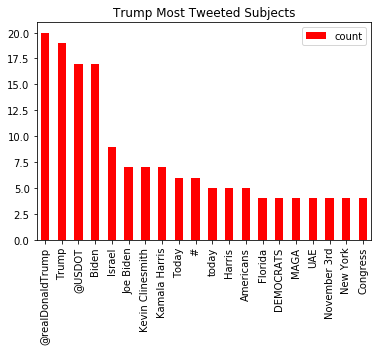

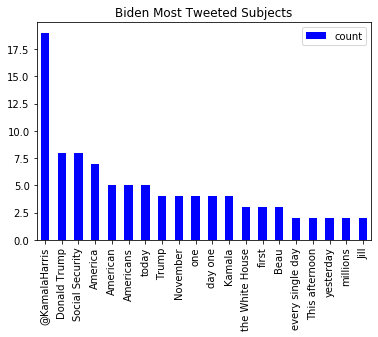

In [39]:
# Plot the top twenty subjects in side-by-side barchart

trump_subject_count[:20].plot.bar(color="red")
plt.title("Trump Most Tweeted Subjects")

biden_subject_count[:20].plot.bar(color="blue")
plt.title("Biden Most Tweeted Subjects")

In [46]:
# Finding the most retweeted tweet of each candidate

trump_highest_count = trump_week.retweet_count.max()
biden_highest_count = biden_week.retweet_count.max()

trump_retweeted = trump_week.loc[trump_week["retweet_count"] == trump_highest_count]
biden_retweeted = biden_week.loc[biden_week["retweet_count"] == biden_highest_count]

trump_index = trump_retweeted.index[0]
biden_index = biden_retweeted.index[0]

print(f"Most retweeted Trump Tweet: {trump_retweeted.full_text[trump_index]}")
print("------------------------------")
print(f"Most retweeted Biden Tweet: {biden_retweeted.full_text[biden_index]}")

Most retweeted Trump Tweet: https://t.co/36b2xC1GZf
------------------------------
Most retweeted Biden Tweet: I have the great honor to announce that I’ve picked @KamalaHarris — a fearless fighter for the little guy, and one of the country’s finest public servants — as my running mate.
